In [1]:
using MatrixNetworks
using Distributions
using Clustering
using NPZ
using BenchmarkTools, Compat
using DelimitedFiles
using SparseArrays
using Printf
using LinearAlgebra
using Plots
using EllipsoidalGraphEmbedding
using LaTeXStrings

### Compute NMI between the retrieved and the true community

In [2]:
## Compute NMI for each graph
path = "data/LFR_data/"
n_graphs = 10

# Set parameters of simulations
n_clusters = 100;
d0 = 20;
shape = "Ellipsoidal"; #shape = "Spherical"

n_rep = 3;
mus=zeros(Float64,n_graphs)
NMIs=zeros(Float64,n_graphs,n_rep)
NMIs_louvain=zeros(Float64,n_graphs)

for g=1:n_graphs
    println("\n========== Graph $g/$(n_graphs) ==========")
    
    # load communities
    community_true = readdlm(path*"communities"*string(g-1)*".txt",Int)
    community_louvain = readdlm(path*"louvain_communities"*string(g-1)*".txt",Int)

    # load graph
    edgeList = readdlm(path*"edgeList"*string(g-1)*".txt",Int)

    n_nodes = size(community_true)[1]
    n_edges = size(edgeList)[1]

    # construct sparse adjacency matrix from list of edges
    adj = sparse(edgeList[:,1].+1,edgeList[:,2].+1,vec(ones(Int64,n_edges,1)),n_nodes,n_nodes)
    adj = adj+adj' 
    # only the upper triangular part of adjacency matrix was stored

    # keep only the largest connected component
    adj,vertices = largest_component(adj);
    
    community_true = community_true[vertices]
    community_true = rename_com_unique(community_true)
    
    community_louvain = community_louvain[vertices]
    community_louvain = rename_com_unique(community_louvain)

    # load parameters
    LFR_parameters = readdlm(path*"parameters"*string(g-1)*".txt")
    mu = parse(Float64, split(LFR_parameters[4],"=")[2]) 
    # extract mixing marameter (not very robust)
    mus[g] = mu
    
    for j=1:n_rep
        println("\n  ~~~~~ number_rep = $j/$(n_rep) ~~~~~")
        
         _,community,_ = @time sphere_embed_cluster(adj, d0,shape, n_clusters)

        NMIs[g,j] = mutualinfo(community_true,community);
    end
    NMIs_louvain[g] = mutualinfo(community_true,community_louvain);
end




========== Graph 1/10 ==========



  ~~~~~ number_rep = 1/3 ~~~~~


 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 199 iterations
  0.466880 seconds (27.77 k allocations: 277.447 MiB, 12.94% gc time, 9.25% compilation time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

2
Modularity: 0.80316335243406
Number of communities: 20
 -------------------------------------------- 
The first 5 squared singular values divided by N : 


[0.39966622002572627, 0.26583082717854567, 0.17765765984528442, 0.09839465983664755, 0.05673656133432151]
 -------------------------------------------- 
  1.740674 seconds (1.14 M allocations: 773.159 MiB, 5.53% gc time, 2.48% compilation time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 95 iterations
  0.234971 seconds (2.58 k allocations: 131.313 MiB, 9.90% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

2
Modularity: 0.80316335243406
Number of communities: 20
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.39863812249686414, 0.276407302947441, 0.18160032497964226, 0.07798288985168557, 0.0528678630555564]
 -------------------------------------------- 
  1.009407 seconds (655.46 k allocations: 572.171 MiB, 6.13% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 204 iterations
  0.418743 seconds (5.42 k allocations: 283.147 MiB, 8.58% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

1
Modularity: 0.80316335243406
Number of communities: 20
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.3986095113528256, 0.26654383039170204, 0.17724032503904666, 0.10069726488069572, 0.055874794902144295]
 -------------------------------------------- 
  1.298334 seconds (631.49 k allocations: 712.093 MiB, 7.25% gc time)

========== Graph 2/10 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 126 iterations
  0.386226 seconds (3.38 k allocations: 174.496 MiB, 8.88% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

2
Modularity: 0.65603877868852
Number of communities: 20
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.31820045555547705, 0.2332732604450282, 0.16304529875332235, 0.13470088302101293, 0.10907199070829475]
 -------------------------------------------- 
  1.543999 seconds (656.28 k allocations: 616.643 MiB, 4.29% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 194 iterations
  0.597701 seconds (5.15 k allocations: 269.217 MiB, 9.46% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

1
Modularity: 0.65603877868852
Number of communities: 20
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.31974524474290683, 0.23494690533654244, 0.163444876975038, 0.13306310352709624, 0.10190265523112942]
 -------------------------------------------- 
  1.405609 seconds (631.28 k allocations: 699.005 MiB, 6.09% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 154 iterations
  0.380216 seconds (4.11 k allocations: 213.498 MiB, 8.09% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

2
Modularity: 0.65603877868852
Number of communities: 20
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.32141120944558327, 0.23688297414360004, 0.16114192915513612, 0.13244847268826523, 0.10628602402126412]
 -------------------------------------------- 
  1.432369 seconds (743.77 k allocations: 713.838 MiB, 5.09% gc time)

========== Graph 3/10 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 127 iterations
  0.301802 seconds (3.41 k allocations: 175.889 MiB, 8.61% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

2
Modularity: 0.5194079569947484
Number of communities: 20
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2367883624220939, 0.21910053488417422, 0.1599600258724778, 0.13530096255251817, 0.11544791925216596]
 -------------------------------------------- 
  1.363911 seconds (794.93 k allocations: 720.937 MiB, 5.14% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 131 iterations
  0.294664 seconds (3.52 k allocations: 181.460 MiB, 8.22% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

2
Modularity: 0.5194079569947484
Number of communities: 20
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.23804054983502357, 0.21872947383598496, 0.15848608918250687, 0.13429699061268602, 0.12129341162703756]
 -------------------------------------------- 
  2.328563 seconds (842.52 k allocations: 757.224 MiB, 3.74% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 128 iterations
  0.373964 seconds (3.44 k allocations: 177.281 MiB, 8.29% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

2
Modularity: 0.5193940530274014
Number of communities: 20
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.23575382739376227, 0.218228177475751, 0.1587882365202244, 0.13490011691888906, 0.11997698211671334]
 -------------------------------------------- 
  1.672204 seconds (838.30 k allocations: 748.152 MiB, 4.45% gc time)

========== Graph 4/10 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 153 iterations
  0.364798 seconds (4.09 k allocations: 212.106 MiB, 7.59% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

3
Modularity: 0.3806145630177018
Number of communities: 18
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22037031110072056, 0.2127087883903357, 0.1809573590894165, 0.1276747649243982, 0.09880898715449422]
 -------------------------------------------- 
  1.888102 seconds (1.07 M allocations: 951.344 MiB, 5.76% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 117 iterations
  0.336672 seconds (3.15 k allocations: 161.960 MiB, 8.83% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

3
Modularity: 0.38754911479896464
Number of communities: 19
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21928179444460863, 0.21305185800843315, 0.18144672564431413, 0.12902588419517363, 0.09851717371309043]
 -------------------------------------------- 
  2.051787 seconds (1.11 M allocations: 924.125 MiB, 4.37% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 190 iterations
  0.486671 seconds (5.05 k allocations: 263.645 MiB, 7.73% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

3
Modularity: 0.3880315632177303
Number of communities: 19
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21969490916912532, 0.21291714877835277, 0.18123289503376605, 0.12782955686476252, 0.0995911729891726]
 -------------------------------------------- 
  2.234506 seconds (1.14 M allocations: 1.019 GiB, 5.22% gc time)

========== Graph 5/10 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 202 iterations
  0.691234 seconds (5.36 k allocations: 280.361 MiB, 7.84% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

9
Modularity: 0.2564292415230424
Number of communities: 11
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.20855611619697847, 0.19103546671262697, 0.13962579604923178, 0.10830357752656675, 0.09705027758898133]
 -------------------------------------------- 
  3.902048 seconds (2.30 M allocations: 1.768 GiB, 4.55% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 194 iterations
  0.860653 seconds (5.15 k allocations: 269.217 MiB, 10.02% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

12
Modularity: 0.2538015486694406
Number of communities: 10
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2088452822616363, 0.1909236425117141, 0.13950882654381572, 0.10806814895769083, 0.0969233585268807]
 -------------------------------------------- 
  4.743060 seconds (2.29 M allocations: 1.750 GiB, 4.80% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 167 iterations
  0.482971 seconds (4.45 k allocations: 231.608 MiB, 7.82% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

8
Modularity: 0.25127474064477073
Number of communities: 11
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.20848946398842422, 0.1908785469720855, 0.13996105668504283, 0.10761940522543365, 0.09675528272013881]
 -------------------------------------------- 
  4.519688 seconds (2.39 M allocations: 1.778 GiB, 4.64% gc time)

========== Graph 6/10 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 174 iterations
  0.405962 seconds (4.63 k allocations: 241.358 MiB, 9.58% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

14
Modularity: 0.20091404056180426
Number of communities: 6
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.1760208619809296, 0.15742159781447104, 0.1365480796377893, 0.12693559581602748, 0.1000058667548018]
 -------------------------------------------- 
  6.906497 seconds (3.47 M allocations: 2.404 GiB, 4.16% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 209 iterations
  0.583352 seconds (5.54 k allocations: 290.111 MiB, 6.87% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

26
Modularity: 0.19512880279779132
Number of communities: 6
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.17577925189866897, 0.15709587539671022, 0.13630452722623393, 0.12653629305705058, 0.09946852623340639]
 -------------------------------------------- 
  6.553142 seconds (3.14 M allocations: 2.260 GiB, 4.28% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 205 iterations
  0.530697 seconds (5.44 k allocations: 284.539 MiB, 7.70% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

17
Modularity: 0.19751023163293957
Number of communities: 6
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.17611664975292768, 0.15708554791232818, 0.136403043645217, 0.12669990447897733, 0.09948620362631386]
 -------------------------------------------- 
  6.236805 seconds (3.52 M allocations: 2.476 GiB, 4.30% gc time)

========== Graph 7/10 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 224 iterations
  0.522877 seconds (5.93 k allocations: 311.007 MiB, 8.73% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

17
Modularity: 0.17441081800276328
Number of communities: 4
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.14843828927380404, 0.13814584700495408, 0.12434325457556855, 0.10544193222950579, 0.09663144412007979]
 -------------------------------------------- 
  6.206249 seconds (3.58 M allocations: 2.533 GiB, 4.55% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 218 iterations
  0.518198 seconds (5.78 k allocations: 302.648 MiB, 9.10% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

24
Modularity: 0.17616162455620518
Number of communities: 5
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.14814762552171523, 0.13762937390989807, 0.12402846583846211, 0.10566639221965649, 0.0966718573776338]
 -------------------------------------------- 
  5.566312 seconds (3.41 M allocations: 2.425 GiB, 4.84% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 207 iterations
  0.467397 seconds (5.49 k allocations: 287.325 MiB, 9.86% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

16
Modularity: 0.17640193707927623
Number of communities: 6
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.14802751642135648, 0.13793426090206476, 0.12399600462776957, 0.10526610832580324, 0.09685025018441361]
 -------------------------------------------- 
  7.601800 seconds (3.82 M allocations: 2.649 GiB, 4.23% gc time)

========== Graph 8/10 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 214 iterations
  0.912299 seconds (5.67 k allocations: 297.076 MiB, 9.49% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

14
Modularity: 0.17342232619398357
Number of communities: 6
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.16715191376963826, 0.13343133626063464, 0.1205891157283562, 0.11526640995212362, 0.10900631627266381]
 -------------------------------------------- 
  7.939545 seconds (3.40 M allocations: 2.412 GiB, 4.35% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 208 iterations
  0.739249 seconds (5.52 k allocations: 288.719 MiB, 7.78% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

18
Modularity: 0.1708908384682049
Number of communities: 5
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.1668923844274462, 0.13339268945852784, 0.12030112982281808, 0.11545022688367726, 0.10916342968440039]
 -------------------------------------------- 
  6.266992 seconds (3.19 M allocations: 2.283 GiB, 4.43% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 259 iterations
  0.664252 seconds (6.84 k allocations: 359.759 MiB, 8.42% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

14
Modularity: 0.17631186867350032
Number of communities: 5
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.16697339999618166, 0.13362092866382552, 0.12065738727406793, 0.11494933301211617, 0.10915578758947275]
 -------------------------------------------- 
  7.237183 seconds (3.55 M allocations: 2.559 GiB, 4.20% gc time)

========== Graph 9/10 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 233 iterations
  0.598633 seconds (6.17 k allocations: 323.542 MiB, 8.37% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

13
Modularity: 0.1725833711049928
Number of communities: 5
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.1674086277166853, 0.15641995704475437, 0.1308792300390927, 0.11069550093214041, 0.10425219493887744]
 -------------------------------------------- 
  5.416252 seconds (3.10 M allocations: 2.261 GiB, 6.24% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 236 iterations
  0.612917 seconds (6.25 k allocations: 327.721 MiB, 8.78% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

17
Modularity: 0.17514669667451674
Number of communities: 5
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.16736292961529134, 0.1562552779705007, 0.13093183818843498, 0.11075697665274419, 0.10445444377397872]
 -------------------------------------------- 
  6.398288 seconds (3.71 M allocations: 2.617 GiB, 4.74% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 222 iterations
  0.665959 seconds (5.88 k allocations: 308.221 MiB, 10.11% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

23
Modularity: 0.1744916381275269
Number of communities: 5
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.16738008882985364, 0.15633975902786593, 0.1309861655027627, 0.1105672550517879, 0.10438752222794803]
 -------------------------------------------- 
  6.725935 seconds (3.51 M allocations: 2.483 GiB, 4.54% gc time)

========== Graph 10/10 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 199 iterations
  0.435415 seconds (5.28 k allocations: 276.182 MiB, 9.53% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

17
Modularity: 0.18089045713141266
Number of communities: 5
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.15637396624399807, 0.14776206039986187, 0.1349298552992328, 0.10937014481351585, 0.09685409992296509]
 -------------------------------------------- 
  7.016961 seconds (4.05 M allocations: 2.766 GiB, 4.75% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 246 iterations
  0.675474 seconds (6.50 k allocations: 341.651 MiB, 9.42% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

11
Modularity: 0.1721880196203839
Number of communities: 4
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.15659773868825985, 0.14749435667660596, 0.13507305119624377, 0.10942956601317355, 0.09627741253076678]
 -------------------------------------------- 
  4.606983 seconds (2.78 M allocations: 2.100 GiB, 5.12% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 202 iterations
  0.423104 seconds (5.36 k allocations: 280.360 MiB, 10.62% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

14
Modularity: 0.1733070509401816
Number of communities: 6
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.15661203749571534, 0.14727736028289637, 0.13481698647955753, 0.1094424050963889, 0.09658090785764563]
 -------------------------------------------- 
  5.226348 seconds (3.50 M allocations: 2.453 GiB, 5.19% gc time)


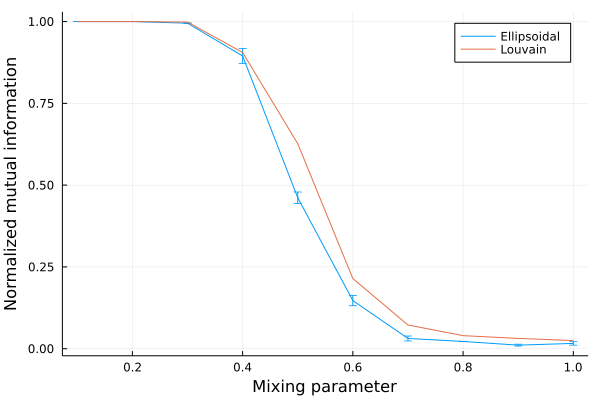

In [3]:
# Plot Normalized mutual information vs Mixing parameter

m = mean(NMIs,dims=2);
s = std(NMIs,dims=2);
plot(mus, m, yerror = s,
markerstrokecolor=:auto,
xlabel = "Mixing parameter",
ylabel = "Normalized mutual information",
labels = "Ellipsoidal")

plot!(mus, NMIs_louvain,
markerstrokecolor=:auto,
xlabel = "Mixing parameter",
ylabel = "Normalized mutual information",
labels = "Louvain")
savefig("figures/nmi_vs_mu.pdf")
plot!()

### Estimating the impact of $d_0$ on embedding quality

In [4]:
g = 4

# Set parameters of simulations
n_clusters = 100
d0s = 10:5:100

n_updates = 100; # max total by default
shape = "Ellipsoidal"; #shape = "Spherical"

n_rep = 3;
NMIs=zeros(Float64,length(d0s),n_rep)

# load communities
community_true = readdlm(path*"communities"*string(g-1)*".txt",Int)

# load graph
edgeList = readdlm(path*"edgeList"*string(g-1)*".txt",Int)

n_nodes = size(community_true)[1]
n_edges = size(edgeList)[1]

# construct sparse adjacency matrix from list of edges
adj = sparse(edgeList[:,1].+1,edgeList[:,2].+1,vec(ones(Int64,n_edges,1)),n_nodes,n_nodes)
adj = adj+adj' # only the upper triangular part of adjacency matrix was stored

# keep only the largest connected component
adj,vertices = largest_component(adj);

community_true = community_true[vertices]
community_true = rename_com_unique(community_true)

# load parameters
LFR_parameters = readdlm(path*"parameters"*string(g-1)*".txt")
mu = parse(Float64, split(LFR_parameters[4],"=")[2]) # extract mixing marameter (not very robust)
print("mu=$mu")

for i=1:length(d0s)
    println("\n========== d0 step $i/$(length(d0s)) ==========")
    d0=d0s[i]
    for j=1:n_rep
        println("\n  ~~~~~ number_rep = $j/$(n_rep) ~~~~~")
        
        _,community,_ = @time sphere_embed_cluster(adj, d0,shape, n_clusters)

        NMIs[i,j] = mutualinfo(community_true,community);
    end
end


mu=0.4
========== d0 step 1/19 ==========



  ~~~~~ number_rep = 1/3 ~~~~~


 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 

370 iterations
  2.456231 seconds (10.34 k allocations: 260.010 MiB, 17.97% gc time, 0.39% compilation time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 10


Number of updates: 7
Modularity: 0.3685477137636403
Number of communities: 13
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2199453630428247, 0.21294940790383207, 0.18087197639934743, 0.12786963405146853, 0.09947008817395152]
 -------------------------------------------- 
  7.236966 seconds (1.98 M allocations: 1.438 GiB, 10.39% gc time, 0.13% compilation time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 314 iterations
  0.469043 seconds (8.27 k allocations: 220.550 MiB, 11.40% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 10
Number of updates: 

9
Modularity: 0.3598078437529733
Number of communities: 11
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22007196383185268, 0.21290432904833223, 0.18126305441162952, 0.1282516482366051, 0.09890947906660214]
 -------------------------------------------- 
  3.473918 seconds (2.03 M allocations: 1.429 GiB, 7.95% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 340 iterations
  0.337524 seconds (8.95 k allocations: 238.851 MiB, 9.20% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 10
Number of updates: 

9
Modularity: 0.3675474083663801
Number of communities: 12
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2199925582875693, 0.21306437167186074, 0.18102615751782522, 0.12810647123230898, 0.09920678633530804]
 -------------------------------------------- 
  2.492905 seconds (2.36 M allocations: 1.627 GiB, 9.62% gc time)

========== d0 step 2/19 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 267 iterations
  0.398144 seconds (7.05 k allocations: 279.166 MiB, 8.12% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 15
Number of updates: 

6
Modularity: 0.382144868217918
Number of communities: 15
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21975863259100625, 0.2129961108097389, 0.1809139144296342, 0.12801292887563945, 0.09934748919395328]
 -------------------------------------------- 
  2.478457 seconds (1.81 M allocations: 1.416 GiB, 8.41% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 274 iterations
  0.401998 seconds (7.23 k allocations: 286.504 MiB, 7.98% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 15
Number of updates: 

4
Modularity: 0.37957591471896673
Number of communities: 16
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2198356546279747, 0.2128559507736598, 0.18106513361679907, 0.12803174179082036, 0.09908698524019462]
 -------------------------------------------- 
  2.138034 seconds (1.39 M allocations: 1.170 GiB, 7.53% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 274 iterations
  0.413009 seconds (7.23 k allocations: 286.504 MiB, 11.07% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 15
Number of updates: 

12
Modularity: 0.3770364342166686
Number of communities: 16
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2199092769921702, 0.21303376889038664, 0.18085065360985866, 0.1282100677433059, 0.09917348881875224]
 -------------------------------------------- 
  2.276236 seconds (1.51 M allocations: 1.241 GiB, 8.17% gc time)

========== d0 step 3/19 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 285 iterations
  0.613214 seconds (7.52 k allocations: 395.976 MiB, 10.23% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

3
Modularity: 0.3873572456325521
Number of communities: 19
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21983995896031633, 0.21285455647006332, 0.18082736599651456, 0.12805215469647188, 0.09919054139819086]
 -------------------------------------------- 
  2.065750 seconds (1.12 M allocations: 1.133 GiB, 6.73% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 272 iterations
  0.598411 seconds (7.18 k allocations: 377.868 MiB, 9.91% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

3
Modularity: 0.38792610665375865
Number of communities: 19
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21983438987102913, 0.21282869650721456, 0.18091738957658868, 0.12811203042781824, 0.09922121826769811]
 -------------------------------------------- 
  2.233464 seconds (1.08 M allocations: 1.094 GiB, 5.96% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 158 iterations
  0.609335 seconds (4.22 k allocations: 219.071 MiB, 5.63% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

4
Modularity: 0.3874058545501638
Number of communities: 19
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21981528119964702, 0.21231934691576693, 0.18130714434467857, 0.12757835617140537, 0.09908260390869753]
 -------------------------------------------- 
  2.429354 seconds (1.28 M allocations: 1.065 GiB, 5.07% gc time)

========== d0 step 4/19 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 213 iterations
  0.548712 seconds (5.65 k allocations: 368.929 MiB, 9.85% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 25
Number of updates: 

4
Modularity: 0.3893388960650218
Number of communities: 19
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22023852534354926, 0.21298759039804918, 0.18098816770450765, 0.12796296099977172, 0.09931831510756566]
 -------------------------------------------- 
  2.586299 seconds (1.30 M allocations: 1.269 GiB, 6.69% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 282 iterations
  0.764631 seconds (7.44 k allocations: 488.857 MiB, 9.69% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 25
Number of updates: 

4
Modularity: 0.38717600196003993
Number of communities: 19
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2197901657592919, 0.2128311405965413, 0.18085678371441136, 0.12812364257156833, 0.09919319623556634]
 -------------------------------------------- 
  2.811089 seconds (1.30 M allocations: 1.383 GiB, 6.80% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 265 iterations
  0.677824 seconds (7.00 k allocations: 459.310 MiB, 9.80% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 25
Number of updates: 

4
Modularity: 0.3870128032352731
Number of communities: 18
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21993807564833226, 0.21292084118359852, 0.18108030871537098, 0.12814287658756557, 0.09921227637601417]
 -------------------------------------------- 
  2.688997 seconds (1.28 M allocations: 1.344 GiB, 7.26% gc time)

========== d0 step 5/19 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 155 iterations
  0.489320 seconds (4.14 k allocations: 321.394 MiB, 8.96% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 30
Number of updates: 

5
Modularity: 0.3877210454894114
Number of communities: 19
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22011327891650836, 0.2126401270135256, 0.18128847430770073, 0.1285105414820808, 0.09866020382294784]
 -------------------------------------------- 
  2.518404 seconds (1.13 M allocations: 1.149 GiB, 5.72% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 284 iterations
  1.006685 seconds (7.49 k allocations: 590.171 MiB, 11.06% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 30
Number of updates: 

4
Modularity: 0.3893941427813408
Number of communities: 19
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21982687352327654, 0.21288441996769084, 0.1808592907041561, 0.12831278622037076, 0.099044175849196]
 -------------------------------------------- 
  3.385654 seconds (1.27 M allocations: 1.501 GiB, 6.82% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 232 iterations
  0.857655 seconds (6.14 k allocations: 481.826 MiB, 7.64% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 30
Number of updates: 

5
Modularity: 0.3883688244196823
Number of communities: 19
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22022301234158, 0.21310424016075782, 0.18111775962106424, 0.1282678745923199, 0.09890780320332423]
 -------------------------------------------- 
  2.958618 seconds (1.10 M allocations: 1.282 GiB, 6.23% gc time)

========== d0 step 6/19 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 214 iterations
  0.814950 seconds (5.67 k allocations: 518.066 MiB, 8.07% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 35
Number of updates: 

5
Modularity: 0.38723339718299343
Number of communities: 19
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22018787379457103, 0.21308104383156048, 0.18104251375771077, 0.12824513658158784, 0.09903429569762326]
 -------------------------------------------- 
  4.160929 seconds (1.56 M allocations: 1.673 GiB, 5.62% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 285 iterations
  1.007118 seconds (7.52 k allocations: 690.554 MiB, 8.45% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 35
Number of updates: 

6
Modularity: 0.387945581152611
Number of communities: 20
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2198528899734334, 0.21289041205371165, 0.18094942299745018, 0.12805890831233868, 0.09918511823253154]
 -------------------------------------------- 
  4.024387 seconds (1.38 M allocations: 1.711 GiB, 5.65% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 185 iterations
  0.633982 seconds (4.92 k allocations: 447.614 MiB, 8.45% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 35
Number of updates: 

5
Modularity: 0.38827034841228575
Number of communities: 20
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21955405413651266, 0.21266071488051005, 0.1810847761048491, 0.127803650503589, 0.09940935040188997]
 -------------------------------------------- 
  3.508087 seconds (1.41 M allocations: 1.498 GiB, 5.68% gc time)

========== d0 step 7/19 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 229 iterations
  0.895596 seconds (6.06 k allocations: 633.508 MiB, 9.31% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 40
Number of updates: 

5
Modularity: 0.3885702239268082
Number of communities: 20
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22022739551203419, 0.2131876123326382, 0.1813063368441274, 0.1282746530616808, 0.0988885051591457]
 -------------------------------------------- 
  4.090516 seconds (1.41 M allocations: 1.718 GiB, 5.38% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 214 iterations
  1.275759 seconds (5.67 k allocations: 591.875 MiB, 7.23% gc time)


 -------------- Clustering ------- 
dimension of embedding used for clustering: 40
Number of updates: 

4
Modularity: 0.3888729125638306
Number of communities: 20
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22005970568425834, 0.21304482557778898, 0.18100990795500946, 0.12816703630048884, 0.09918193603853652]
 -------------------------------------------- 
  5.484483 seconds (1.27 M allocations: 1.581 GiB, 4.69% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 311 iterations
  5.650361 seconds (8.20 k allocations: 861.104 MiB, 3.43% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 40
Number of updates: 

5
Modularity: 0.388783034762946
Number of communities: 21
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22003683277975786, 0.21293889929012094, 0.1810550481725857, 0.12814926627846532, 0.09907299962700661]
 -------------------------------------------- 
 10.453117 seconds (1.51 M allocations: 2.010 GiB, 3.42% gc time)

========== d0 step 8/19 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 215 iterations
  1.058088 seconds (5.70 k allocations: 668.914 MiB, 7.69% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 45
Number of updates: 

6
Modularity: 0.3879831591188444
Number of communities: 23
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21999677340537413, 0.21298082284680694, 0.1810962225126494, 0.12803097830614538, 0.09921410882693461]
 -------------------------------------------- 
  5.433997 seconds (1.57 M allocations: 1.919 GiB, 4.92% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 328 iterations
  3.035796 seconds (8.64 k allocations: 1021.724 MiB, 6.07% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 45
Number of updates: 

6
Modularity: 0.3881801153136114
Number of communities: 23
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22004159874926216, 0.21299483117496915, 0.18116597752108654, 0.12817944345175525, 0.09907796247708604]
 -------------------------------------------- 
  8.840187 seconds (1.60 M allocations: 2.288 GiB, 4.91% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 271 iterations
  1.301141 seconds (7.16 k allocations: 843.757 MiB, 7.39% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 45
Number of updates: 

6
Modularity: 0.3882081336793137
Number of communities: 22
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21987142301040766, 0.21288198006136827, 0.1809626007522901, 0.12805113848511407, 0.09917182322648975]
 -------------------------------------------- 
  6.328957 seconds (1.70 M allocations: 2.189 GiB, 4.84% gc time)

========== d0 step 9/19 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 268 iterations
  1.319564 seconds (7.34 k allocations: 927.096 MiB, 9.13% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 50
Number of updates: 

6
Modularity: 0.38699846592446324
Number of communities: 25
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21984520273122105, 0.21282742075628078, 0.18091027829332537, 0.12816529839611746, 0.09911920000635532]
 -------------------------------------------- 
 11.441020 seconds (1.55 M allocations: 2.209 GiB, 3.56% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 153 iterations
  1.151800 seconds (4.24 k allocations: 528.145 MiB, 7.80% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 50
Number of updates: 

5
Modularity: 0.38747408844569164
Number of communities: 24
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22018477200044673, 0.21281564528047547, 0.18043062723065362, 0.12842345792120707, 0.09880723010919185]
 -------------------------------------------- 
 14.861578 seconds (1.53 M allocations: 1.809 GiB, 3.00% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 284 iterations
  4.960562 seconds (7.78 k allocations: 982.602 MiB, 6.73% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 50
Number of updates: 

6
Modularity: 0.3869275526656033
Number of communities: 22
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2198850685105654, 0.21282711177536498, 0.18088272428970822, 0.12803943215334576, 0.09919940632927496]
 -------------------------------------------- 
 19.657322 seconds (1.70 M allocations: 2.382 GiB, 3.76% gc time)

========== d0 step 10/19 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 213 iterations
  2.853029 seconds (5.86 k allocations: 810.017 MiB, 5.36% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 55
Number of updates: 

5
Modularity: 0.3868775434567026
Number of communities: 23
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22011635077239158, 0.2130797099416155, 0.18107588797611474, 0.12815799790276708, 0.0991128121795429]
 -------------------------------------------- 
 11.995412 seconds (1.56 M allocations: 2.154 GiB, 3.71% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 266 iterations
  7.910809 seconds (7.29 k allocations: 1012.294 MiB, 2.25% gc time)


 -------------- Clustering ------- 
dimension of embedding used for clustering: 55
Number of updates: 

6
Modularity: 0.38783353694962003
Number of communities: 26
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21983755221031354, 0.21284974664293105, 0.18091343083671987, 0.1281226102815245, 0.09917083712825535]
 -------------------------------------------- 
 16.503305 seconds (1.69 M allocations: 2.464 GiB, 2.77% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 270 iterations
  2.281237 seconds (7.40 k allocations: 1.003 GiB, 4.92% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 55
Number of updates: 

6
Modularity: 0.38739334388799057
Number of communities: 25
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21986410834872663, 0.21285342871765825, 0.18098119173502977, 0.12809240084701304, 0.09909264590396076]
 -------------------------------------------- 
  9.050203 seconds (1.68 M allocations: 2.468 GiB, 4.20% gc time)

========== d0 step 11/19 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 285 iterations
  4.963267 seconds (7.80 k allocations: 1.156 GiB, 3.87% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 60
Number of updates: 

7
Modularity: 0.3867137929753681
Number of communities: 27
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21986908521100237, 0.21280936565622408, 0.18082657432985347, 0.12815527192745346, 0.0991391131686501]
 -------------------------------------------- 
 12.633576 seconds (1.77 M allocations: 2.739 GiB, 3.57% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 267 iterations
  1.600747 seconds (7.32 k allocations: 1.083 GiB, 6.65% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 60
Number of updates: 

7
Modularity: 0.38699536856373146
Number of communities: 26
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21987679157707501, 0.21287709296948906, 0.18095038488072848, 0.12816894693176956, 0.09920523083245684]
 -------------------------------------------- 
  8.832461 seconds (1.75 M allocations: 2.650 GiB, 3.73% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 267 iterations
  1.558865 seconds (7.32 k allocations: 1.083 GiB, 7.49% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 60
Number of updates: 

7
Modularity: 0.38689764495165435
Number of communities: 24
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21991496804180574, 0.2129235711452924, 0.1809281136867116, 0.12815253826860262, 0.0990976247712021]
 -------------------------------------------- 
  9.549389 seconds (1.72 M allocations: 2.618 GiB, 3.69% gc time)

========== d0 step 12/19 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 234 iterations
  1.675412 seconds (6.43 k allocations: 1.028 GiB, 6.49% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 65
Number of updates: 

8
Modularity: 0.3868342138462491
Number of communities: 27
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22014936052614262, 0.21311531664566188, 0.18108135247356885, 0.12821400311332254, 0.09907553629677726]
 -------------------------------------------- 
  9.676026 seconds (1.99 M allocations: 2.861 GiB, 4.20% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 153 iterations
  1.104983 seconds (4.24 k allocations: 686.950 MiB, 8.06% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 65
Number of updates: 

6
Modularity: 0.3866045953346692
Number of communities: 27
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21993653870529425, 0.2129860420223503, 0.18080201055352416, 0.1281592083067895, 0.09875402128393108]
 -------------------------------------------- 
  8.571591 seconds (1.70 M allocations: 2.251 GiB, 3.94% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 285 iterations
  2.520557 seconds (7.80 k allocations: 1.253 GiB, 7.20% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 65
Number of updates: 

6
Modularity: 0.3860528053272665
Number of communities: 29
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21985651526365735, 0.2128167330153954, 0.18083482577212387, 0.12811184485182453, 0.09919690258398546]
 -------------------------------------------- 
 11.830525 seconds (1.73 M allocations: 2.858 GiB, 3.94% gc time)

========== d0 step 13/19 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 285 iterations
  2.227295 seconds (7.80 k allocations: 1.349 GiB, 8.59% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 70
Number of updates: 

7
Modularity: 0.38606574234678737
Number of communities: 26
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21986780165033715, 0.21282464405207355, 0.18085848028210885, 0.1281065648971229, 0.09917412509358375]
 -------------------------------------------- 
 12.372995 seconds (1.95 M allocations: 3.209 GiB, 4.34% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 214 iterations
  1.473723 seconds (5.89 k allocations: 1.012 GiB, 8.17% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 70
Number of updates: 

6
Modularity: 0.386018027943611
Number of communities: 26
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22010305072257022, 0.213014011569977, 0.18113427214977637, 0.12825289258102, 0.09905511691032522]
 -------------------------------------------- 
 10.048884 seconds (1.71 M allocations: 2.653 GiB, 3.84% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 270 iterations
  2.583992 seconds (7.40 k allocations: 1.278 GiB, 8.36% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 70
Number of updates: 

7
Modularity: 0.3866875970783286
Number of communities: 29
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21987994515559217, 0.21285310405356772, 0.1809124612895346, 0.1281519644676066, 0.09911756437744398]
 -------------------------------------------- 
 16.378483 seconds (1.93 M allocations: 3.118 GiB, 3.50% gc time)

========== d0 step 14/19 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 285 iterations
  2.144911 seconds (7.80 k allocations: 1.446 GiB, 9.46% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 75
Number of updates: 

6
Modularity: 0.38478388644100786
Number of communities: 35
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21990286945194112, 0.21289676017291068, 0.18092933099477596, 0.1281018956377102, 0.09914266658871057]
 -------------------------------------------- 
 11.724314 seconds (1.74 M allocations: 3.182 GiB, 4.21% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 267 iterations
  2.288557 seconds (7.32 k allocations: 1.355 GiB, 9.69% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 75
Number of updates: 

7
Modularity: 0.38441173081612845
Number of communities: 32
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21988032840095773, 0.2128859333811917, 0.18096382148661616, 0.1281980895898859, 0.09917928739588115]
 -------------------------------------------- 
 11.188383 seconds (1.74 M allocations: 3.104 GiB, 4.41% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 214 iterations
  2.405037 seconds (5.89 k allocations: 1.085 GiB, 7.37% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 75
Number of updates: 

6
Modularity: 0.3852486702896619
Number of communities: 29
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22007747350617154, 0.21303130750375388, 0.18113245399069935, 0.12817795213250752, 0.09911604180851218]
 -------------------------------------------- 
 16.275520 seconds (1.94 M allocations: 3.011 GiB, 3.25% gc time)

========== d0 step 15/19 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 268 iterations
  2.610640 seconds (7.34 k allocations: 1.451 GiB, 9.11% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 80
Number of updates: 

7
Modularity: 0.38463227878413486
Number of communities: 31
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21987324104626077, 0.2128705675599983, 0.1809057681585931, 0.12806126302809467, 0.09914643985657862]
 -------------------------------------------- 
 15.122473 seconds (2.00 M allocations: 3.458 GiB, 4.08% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 312 iterations
  2.350131 seconds (8.53 k allocations: 1.690 GiB, 9.68% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 80
Number of updates: 

7
Modularity: 0.384571209364038
Number of communities: 37
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22003479900010667, 0.21294011952184838, 0.18106941191485906, 0.12812636537304872, 0.09908173426389635]
 -------------------------------------------- 
 13.588728 seconds (1.95 M allocations: 3.643 GiB, 3.93% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 213 iterations
  2.237361 seconds (5.86 k allocations: 1.152 GiB, 9.55% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 80
Number of updates: 

6
Modularity: 0.3840913441692025
Number of communities: 33
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22004931866591704, 0.21305092373953285, 0.18096334897152266, 0.12811035419084957, 0.09921590893440425]
 -------------------------------------------- 
 13.054401 seconds (1.73 M allocations: 2.909 GiB, 3.82% gc time)

========== d0 step 16/19 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 312 iterations
  3.433541 seconds (8.53 k allocations: 1.796 GiB, 8.19% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 85
Number of updates: 

7
Modularity: 0.38465321209391207
Number of communities: 35
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2200151241769692, 0.21292094842090817, 0.18104160088936433, 0.12812786056913036, 0.09908341657787821]
 -------------------------------------------- 
 15.748989 seconds (1.82 M allocations: 3.720 GiB, 8.19% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 268 iterations
  2.763319 seconds (7.34 k allocations: 1.542 GiB, 8.92% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 85
Number of updates: 

8
Modularity: 0.3844968183668125
Number of communities: 33
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21986476595437143, 0.2128485674276293, 0.1809622269163954, 0.12811995371589024, 0.09913711434546502]
 -------------------------------------------- 
 13.233192 seconds (1.75 M allocations: 3.402 GiB, 2.74% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 269 iterations
  2.387902 seconds (7.37 k allocations: 1.548 GiB, 8.34% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 85
Number of updates: 

13
Modularity: 0.38199456053295805
Number of communities: 36
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21989846979118402, 0.2128961623716642, 0.18090571914626208, 0.12810331226112862, 0.09915310464106916]
 -------------------------------------------- 
 13.606014 seconds (1.73 M allocations: 3.386 GiB, 2.58% gc time)

========== d0 step 17/19 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 232 iterations
  2.957874 seconds (6.37 k allocations: 1.413 GiB, 8.15% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 90
Number of updates: 

8
Modularity: 0.3836812343804299
Number of communities: 40
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22009137356514746, 0.21314310049990415, 0.18105409320836993, 0.1282196861692981, 0.09917784674460521]
 -------------------------------------------- 
 15.308867 seconds (2.10 M allocations: 3.646 GiB, 2.54% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 156 iterations
  1.239354 seconds (4.32 k allocations: 971.552 MiB, 10.35% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 90
Number of updates: 

7
Modularity: 0.3818598357910591
Number of communities: 30
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21994053110842873, 0.2127255739927151, 0.1811134175366249, 0.1282860054196511, 0.09836540139969034]
 -------------------------------------------- 
 14.984398 seconds (1.95 M allocations: 3.024 GiB, 1.83% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 268 iterations
  2.304776 seconds (7.34 k allocations: 1.633 GiB, 9.96% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 90
Number of updates: 

9
Modularity: 0.3821141286891437
Number of communities: 35
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21987372101269978, 0.21291507003105656, 0.18096085090482547, 0.1281540472369943, 0.0991208257350589]
 -------------------------------------------- 
 20.643317 seconds (2.04 M allocations: 3.798 GiB, 2.02% gc time)

========== d0 step 18/19 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 330 iterations
  4.851008 seconds (9.02 k allocations: 2.125 GiB, 9.36% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 95
Number of updates: 

12
Modularity: 0.3842073384476207
Number of communities: 35
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22004627235034208, 0.2129911659212143, 0.18113493132583444, 0.1282013021162226, 0.0990524304987016]
 -------------------------------------------- 
 27.614496 seconds (2.06 M allocations: 4.404 GiB, 3.39% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 285 iterations
  2.718043 seconds (7.80 k allocations: 1.835 GiB, 9.77% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 95
Number of updates: 

9
Modularity: 0.3815440889152699
Number of communities: 38
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21991159422418133, 0.21286823018177, 0.18085728476248547, 0.12812409337670624, 0.0991422671638624]
 -------------------------------------------- 
 18.282903 seconds (2.23 M allocations: 4.303 GiB, 3.73% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 233 iterations
  2.276462 seconds (6.40 k allocations: 1.499 GiB, 10.05% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 95
Number of updates: 

8
Modularity: 0.3808722918544119
Number of communities: 37
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2201323856079002, 0.21310253807725632, 0.18108420905259648, 0.1281489790949093, 0.09909618713553049]
 -------------------------------------------- 
 28.812011 seconds (2.11 M allocations: 3.841 GiB, 2.60% gc time)

========== d0 step 19/19 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 284 iterations
  6.303961 seconds (7.78 k allocations: 1.925 GiB, 7.17% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

7
Modularity: 0.379113467475777
Number of communities: 44
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21985895138398678, 0.21284157852991514, 0.18085697331026462, 0.12815981790147438, 0.0991548335381887]
 -------------------------------------------- 
 43.074371 seconds (2.02 M allocations: 4.189 GiB, 2.49% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 213 iterations
  7.092809 seconds (5.86 k allocations: 1.442 GiB, 6.65% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

7
Modularity: 0.3811011537906985
Number of communities: 40
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22013904843244653, 0.21300219904770804, 0.18105670819820324, 0.12808884304334506, 0.09903646622943947]
 -------------------------------------------- 
 45.808840 seconds (2.03 M allocations: 3.725 GiB, 2.55% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 312 iterations
 10.195488 seconds (8.53 k allocations: 2.115 GiB, 7.14% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

9
Modularity: 0.38104426434459865
Number of communities: 42
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22002690988490545, 0.21293619673480332, 0.18109788330312618, 0.12812200077637625, 0.09908980446250513]
 -------------------------------------------- 
 54.491848 seconds (2.18 M allocations: 4.557 GiB, 2.51% gc time)


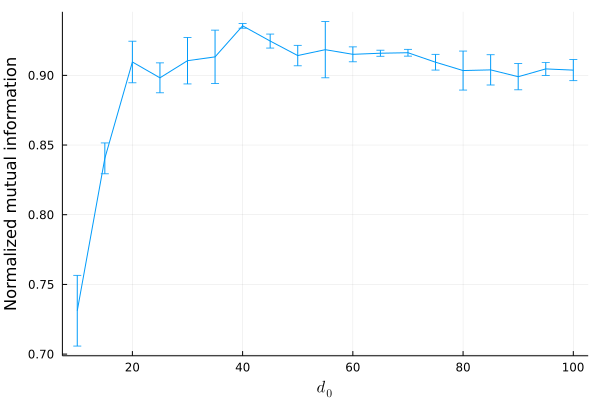

In [5]:
# Plot Normalized mutual information vs d0
m = mean(NMIs,dims=2);
s = std(NMIs,dims=2);
plot(d0s, m, yerror = s,
markerstrokecolor=:auto,
xlabel = L"d_0",
ylabel = "Normalized mutual information",
legend = false)

savefig("figures/nmi_vs_d0__mu"*string(mu)*".pdf")
plot!()


### Test impact of n_clusters

In [6]:
g = 4

# Set parameters of simulations
n_it_PPM = 30000;
t = 1e-10;
n_clusters_list = 10:10:100;
d0 = 100;

# Specify here the number of times vector partition is repeated
n_it_Vec_Partition = 100;
# we advise : n_it_Vec_Partition = 100;

n_updates = 100; # max total by default
shape = "Ellipsoidal"; #shape = "Spherical"

n_rep = 3;
NMIs=zeros(Float64,length(n_clusters_list),n_rep)

# load communities
community_true = readdlm(path*"communities"*string(g-1)*".txt",Int)

# load graph
edgeList = readdlm(path*"edgeList"*string(g-1)*".txt",Int)

n_nodes = size(community_true)[1]
n_edges = size(edgeList)[1]

# construct sparse adjacency matrix from list of edges
adj = sparse(edgeList[:,1].+1,edgeList[:,2].+1,vec(ones(Int64,n_edges,1)),n_nodes,n_nodes)
adj = adj+adj' # only the upper triangular part of adjacency matrix was stored

# keep only the largest connected component
adj,vertices = largest_component(adj);

community_true = community_true[vertices]
community_true = rename_com_unique(community_true)

# load parameters
LFR_parameters = readdlm(path*"parameters"*string(g-1)*".txt")
mu = parse(Float64, split(LFR_parameters[4],"=")[2]) # extract mixing marameter (not very robust)
print("mu=$mu")

for i=1:length(n_clusters_list)
    println("\n========== n_clusters step $i/$(length(n_clusters_list)) ==========")
    n_clusters = n_clusters_list[i]
    for j=1:n_rep
        println("\n  ~~~~~ number_rep = $j/$(n_rep) ~~~~~")

        # embed cluster
        _,community,_ = @time sphere_embed_cluster(adj, d0,shape, n_clusters)

        NMIs[i,j] = mutualinfo(community_true,community);
    end
end




mu=0.4
========== n_clusters step 1/10 ==========



  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 

156 iterations
  4.653933 seconds (4.32 k allocations: 1.055 GiB, 7.48% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100


Number of updates: 13
Modularity: 0.3512116143687409
Number of communities: 10
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2200454769918737, 0.21264181904191815, 0.18106199531244374, 0.12842497236933836, 0.09860373645809867]
 -------------------------------------------- 
 12.095800 seconds (3.05 M allocations: 2.745 GiB, 6.71% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 267 iterations
  4.938573 seconds (7.32 k allocations: 1.810 GiB, 7.18% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

14
Modularity: 0.34706675215326555
Number of communities: 10
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2198722493546575, 0.21286932855455465, 0.18100593220411482, 0.1281203189418782, 0.09915366379208783]
 -------------------------------------------- 
 12.265892 seconds (2.75 M allocations: 3.327 GiB, 6.20% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 285 iterations
  3.350909 seconds (7.80 k allocations: 1.932 GiB, 8.36% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

11
Modularity: 0.34376401257908
Number of communities: 10
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2198714405829468, 0.212867857489769, 0.18084816459976166, 0.12814412744923226, 0.09918536505942438]
 -------------------------------------------- 
  7.322165 seconds (2.80 M allocations: 3.482 GiB, 8.26% gc time)

========== n_clusters step 2/10 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 311 iterations
  3.264405 seconds (8.51 k allocations: 2.109 GiB, 9.19% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

9
Modularity: 0.36751798552941495
Number of communities: 18
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22002782131808973, 0.2129274104777182, 0.18105794809465847, 0.12811903861498902, 0.09909333856918036]
 -------------------------------------------- 
  7.928732 seconds (2.50 M allocations: 3.672 GiB, 7.66% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 233 iterations
  2.436102 seconds (6.40 k allocations: 1.578 GiB, 9.39% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

9
Modularity: 0.3697970620116448
Number of communities: 20
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22015152241033117, 0.21307088696880416, 0.1809524484554927, 0.12823454596024222, 0.0990481550168681]
 -------------------------------------------- 
  7.156748 seconds (2.43 M allocations: 3.101 GiB, 7.42% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 214 iterations
  2.103582 seconds (5.89 k allocations: 1.449 GiB, 8.83% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

13
Modularity: 0.36705963884071635
Number of communities: 18
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22011599566631876, 0.21304778320750586, 0.18105635670558537, 0.12819939875968062, 0.09914094785828456]
 -------------------------------------------- 
  7.698035 seconds (2.65 M allocations: 3.114 GiB, 6.82% gc time)

========== n_clusters step 3/10 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 232 iterations
  2.469286 seconds (6.37 k allocations: 1.572 GiB, 9.37% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

11
Modularity: 0.37643470187994915
Number of communities: 23
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22017278091469403, 0.2131248908778519, 0.18112326517125585, 0.12822873206353935, 0.09905223995696688]
 -------------------------------------------- 
  8.568778 seconds (2.40 M allocations: 3.260 GiB, 6.30% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 312 iterations
  3.550174 seconds (8.53 k allocations: 2.115 GiB, 11.14% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

14
Modularity: 0.3760629224527295
Number of communities: 23
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22004558388859702, 0.21294632124961949, 0.1811015388507939, 0.1281217920229453, 0.09907132176010025]
 -------------------------------------------- 
 10.060064 seconds (2.28 M allocations: 3.722 GiB, 7.05% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 284 iterations
  2.834597 seconds (7.78 k allocations: 1.925 GiB, 10.26% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

14
Modularity: 0.3766564829402847
Number of communities: 28
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21983184776000705, 0.21283606023631144, 0.1808060828613158, 0.1281052142449394, 0.09918479818867737]
 -------------------------------------------- 
  8.634450 seconds (2.33 M allocations: 3.565 GiB, 6.84% gc time)

========== n_clusters step 4/10 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 214 iterations
  2.418917 seconds (5.89 k allocations: 1.449 GiB, 9.79% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

8
Modularity: 0.3803725425232725
Number of communities: 31
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2200896787111066, 0.21306354624953025, 0.1809911554637837, 0.12821537103808092, 0.09910384540507303]
 -------------------------------------------- 
  9.445256 seconds (2.37 M allocations: 3.260 GiB, 5.86% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 285 iterations
  2.671876 seconds (7.80 k allocations: 1.932 GiB, 10.57% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

9
Modularity: 0.37877203047980196
Number of communities: 27
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2198465369104984, 0.21283185393191334, 0.1808348336692692, 0.12813813590017384, 0.0991947891680111]
 -------------------------------------------- 
  9.765708 seconds (2.40 M allocations: 3.768 GiB, 6.28% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 214 iterations
  2.266980 seconds (5.89 k allocations: 1.449 GiB, 11.01% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

11
Modularity: 0.3765629393022047
Number of communities: 30
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22010825729120423, 0.21302823674612864, 0.18098539024554613, 0.12817683786025907, 0.09917676326110086]
 -------------------------------------------- 
  8.781052 seconds (2.22 M allocations: 3.143 GiB, 6.13% gc time)

========== n_clusters step 5/10 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 214 iterations
  2.062299 seconds (5.89 k allocations: 1.449 GiB, 9.98% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

8
Modularity: 0.38163066035672283
Number of communities: 30
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22014425183066805, 0.21305648813755915, 0.18108221917040782, 0.1281322792698052, 0.09909930594493345]
 -------------------------------------------- 
  9.611709 seconds (2.11 M allocations: 3.209 GiB, 5.49% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 156 iterations
  1.708651 seconds (4.32 k allocations: 1.055 GiB, 10.01% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

7
Modularity: 0.37628437329511927
Number of communities: 30
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22012018808327052, 0.21271729492057836, 0.18100786829299517, 0.1283078412490688, 0.09850978004078798]
 -------------------------------------------- 
  8.817506 seconds (1.94 M allocations: 2.677 GiB, 5.32% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 329 iterations
  3.783599 seconds (8.99 k allocations: 2.231 GiB, 10.53% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

12
Modularity: 0.37833179979840653
Number of communities: 34
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22005773487154595, 0.21297242969162464, 0.18113984389153628, 0.1281756258194312, 0.09910293414767322]
 -------------------------------------------- 
 11.414679 seconds (2.16 M allocations: 4.030 GiB, 6.36% gc time)

========== n_clusters step 6/10 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 214 iterations
  2.132942 seconds (5.89 k allocations: 1.449 GiB, 10.06% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

8
Modularity: 0.377835122748155
Number of communities: 35
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22008219290437958, 0.21305598668453316, 0.18100973537888645, 0.12817131163273876, 0.09912534165626628]
 -------------------------------------------- 
 14.596752 seconds (2.06 M allocations: 3.292 GiB, 4.75% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 214 iterations
  3.306248 seconds (5.89 k allocations: 1.449 GiB, 34.33% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

8
Modularity: 0.3775660327421209
Number of communities: 33
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22008090461790913, 0.21302613283178434, 0.18100565503923868, 0.12823510405448682, 0.09913188150148308]
 -------------------------------------------- 
 13.760916 seconds (2.11 M allocations: 3.336 GiB, 9.21% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 330 iterations
  3.202630 seconds (9.02 k allocations: 2.238 GiB, 10.24% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

7
Modularity: 0.3779779357397382
Number of communities: 34
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2200203340435612, 0.21297954085686419, 0.18113099513973208, 0.12819803992416984, 0.09908249611790772]
 -------------------------------------------- 
 11.765275 seconds (1.97 M allocations: 4.000 GiB, 3.67% gc time)

========== n_clusters step 7/10 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 214 iterations
  2.401333 seconds (5.89 k allocations: 1.449 GiB, 9.06% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

8
Modularity: 0.38354258046297374
Number of communities: 33
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22008210837961278, 0.21301127987459811, 0.18112498754202935, 0.1281580378916753, 0.09910947695595884]
 -------------------------------------------- 
 18.682781 seconds (2.15 M allocations: 3.520 GiB, 2.68% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 153 iterations
  1.743680 seconds (4.24 k allocations: 1.035 GiB, 10.73% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

8
Modularity: 0.3819678672190129
Number of communities: 36
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2200809495636855, 0.21268063913911617, 0.18095839833014954, 0.12825420631023404, 0.09856265766931925]
 -------------------------------------------- 
 13.843008 seconds (2.20 M allocations: 3.139 GiB, 3.24% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 155 iterations
  1.515961 seconds (4.29 k allocations: 1.048 GiB, 10.20% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

17
Modularity: 0.38184020663316903
Number of communities: 38
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21990576785954763, 0.2127344166522132, 0.18083649464664348, 0.1283631860551146, 0.09873399943647705]
 -------------------------------------------- 
 10.348600 seconds (1.76 M allocations: 2.753 GiB, 3.44% gc time)

========== n_clusters step 8/10 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 313 iterations
  3.663523 seconds (8.56 k allocations: 2.122 GiB, 10.32% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

8
Modularity: 0.37986487214140885
Number of communities: 38
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2200294706461811, 0.21292873935808934, 0.18103530293711556, 0.1281537009816773, 0.09908221874237029]
 -------------------------------------------- 
 28.471086 seconds (2.14 M allocations: 4.284 GiB, 3.65% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 267 iterations
 10.336769 seconds (7.32 k allocations: 1.810 GiB, 7.16% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

9
Modularity: 0.38021767448668187
Number of communities: 42
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2198542794136143, 0.2128603102734011, 0.1809433753805393, 0.12810784827763963, 0.09916689706752801]
 -------------------------------------------- 
 25.466334 seconds (2.18 M allocations: 4.010 GiB, 4.25% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 314 iterations
  3.294212 seconds (8.59 k allocations: 2.129 GiB, 9.77% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

7
Modularity: 0.38123913891231515
Number of communities: 38
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22003217947158635, 0.21294066091945407, 0.18106030524285974, 0.12816405509329218, 0.09907340762563721]
 -------------------------------------------- 
 14.894178 seconds (2.08 M allocations: 4.233 GiB, 4.22% gc time)

========== n_clusters step 9/10 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 153 iterations
  1.711293 seconds (4.24 k allocations: 1.035 GiB, 10.80% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

13
Modularity: 0.3805052943174449
Number of communities: 43
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.2200097058703503, 0.21268459922282443, 0.1810798336255953, 0.1283394749592649, 0.09857125281753987]
 -------------------------------------------- 
 16.050155 seconds (2.04 M allocations: 3.211 GiB, 3.28% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 214 iterations
  3.354137 seconds (5.89 k allocations: 1.449 GiB, 8.05% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

8
Modularity: 0.381600669043294
Number of communities: 39
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22011295615660706, 0.21300937647795548, 0.1810537876912873, 0.12813311428299393, 0.09917589070987579]
 -------------------------------------------- 
 17.160248 seconds (2.13 M allocations: 3.715 GiB, 3.62% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 152 iterations
  1.723176 seconds (4.21 k allocations: 1.028 GiB, 9.52% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

9
Modularity: 0.38274552212134616
Number of communities: 41
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22010524549525926, 0.21277512140399063, 0.18099707373156007, 0.12831931416203357, 0.09852325688831957]
 -------------------------------------------- 
 14.483581 seconds (2.00 M allocations: 3.159 GiB, 3.38% gc time)

========== n_clusters step 10/10 ==========

  ~~~~~ number_rep = 1/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 313 iterations
  3.158620 seconds (8.56 k allocations: 2.122 GiB, 9.79% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

8
Modularity: 0.38153499747182634
Number of communities: 41
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.22000911584538177, 0.21292658392468802, 0.18106769441834927, 0.1281299090031975, 0.09910176784841467]
 -------------------------------------------- 
 19.723585 seconds (2.24 M allocations: 4.621 GiB, 3.60% gc time)

  ~~~~~ number_rep = 2/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 267 iterations
  2.796525 seconds (7.32 k allocations: 1.810 GiB, 10.27% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

7
Modularity: 0.38052566333073257
Number of communities: 39
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21986345436497506, 0.21287582771786376, 0.18096446282240125, 0.12816021551122703, 0.09912225355167993]
 -------------------------------------------- 
 18.072005 seconds (1.98 M allocations: 4.036 GiB, 3.72% gc time)

  ~~~~~ number_rep = 3/3 ~~~~~
 ------- Acc Projected Power Iteration -------


The iteration has become stationary after 267 iterations
  2.695865 seconds (7.32 k allocations: 1.810 GiB, 10.40% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 100
Number of updates: 

8
Modularity: 0.37832469802258556
Number of communities: 41
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.21986785829236527, 0.21287277612507305, 0.18091030186999044, 0.12811479241759044, 0.09917385497658986]
 -------------------------------------------- 
 16.941749 seconds (2.04 M allocations: 4.106 GiB, 3.76% gc time)


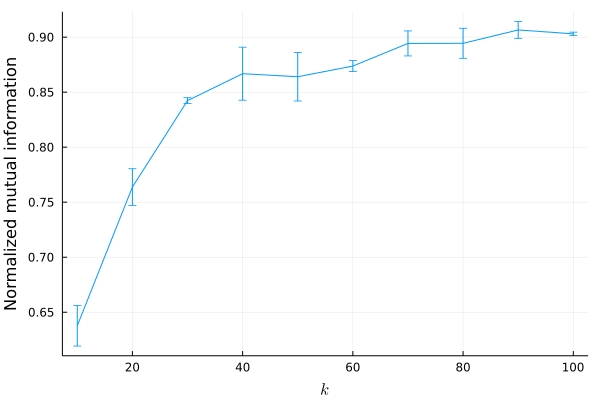

In [7]:
# Plot Normalized mutual information vs d0
m = mean(NMIs,dims=2);
s = std(NMIs,dims=2);
plot(n_clusters_list, m, yerror = s,
markerstrokecolor=:auto,
xlabel = L"k",
ylabel = "Normalized mutual information",
legend = false)

savefig("figures/nmi_vs_nclusters__mu"*string(mu)*".pdf")
plot!()